# Simple example of calculating matrix elements

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from numerov.matrix_elements import radial_matrix_element
from numerov.rydberg import RydbergState
from numerov.units import ureg

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("numerov").setLevel(logging.ERROR)  # disable xmin warnings for now

In [2]:
n_list = np.arange(50, 150, 1)
matrixelements = []
for n in n_list:
    print(f"n={n}", end="\r")
    l = n - 1
    j = n - 0.5
    m = j
    state_i = RydbergState("Rb", n, l, j, dz=0.001)
    state_f = RydbergState("Rb", n + 3, l + 1, j, dz=0.001)
    state_i.integrate()
    state_f.integrate()
    m = radial_matrix_element(state_i, state_f, 1)
    matrixelements.append(np.abs(m))

matrixelements = np.array(matrixelements)

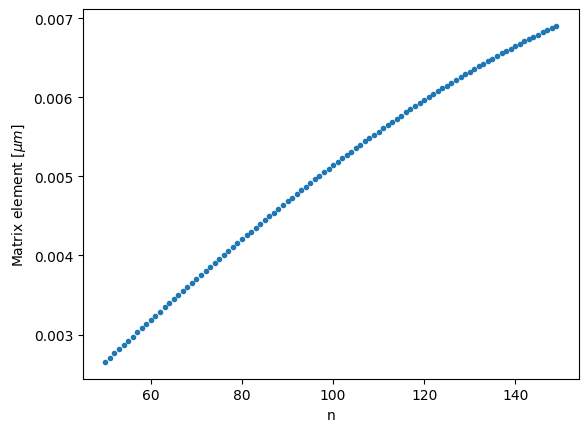

In [3]:
y = matrixelements * ureg.Quantity(1, "bohr_radius").to("mum").magnitude

fig, ax = plt.subplots()
ax.plot(n_list, y, "C0.")
ax.set_xlabel("n")
ax.set_ylabel(r"Matrix element [$\mu m$]")
plt.show()